Descriptive Statistics:
        Accuracy  Completeness  Relevance  Understandability  Readability  \
count  79.000000     78.000000  78.000000          78.000000    78.000000   
mean    2.860759      4.192308   3.833333           3.551282     4.525641   
std     0.445323      1.206666   0.567900           0.766971     0.935926   
min     0.000000      0.000000   0.000000           0.000000     0.000000   
25%     3.000000      4.000000   4.000000           3.000000     4.000000   
50%     3.000000      5.000000   4.000000           4.000000     5.000000   
75%     3.000000      5.000000   4.000000           4.000000     5.000000   
max     3.000000      5.000000   4.000000           4.000000     5.000000   

       Time Taken(sec)  
count        84.000000  
mean         16.977857  
std          17.994265  
min           0.000000  
25%           0.000000  
50%          11.000000  
75%          30.250000  
max          75.000000  



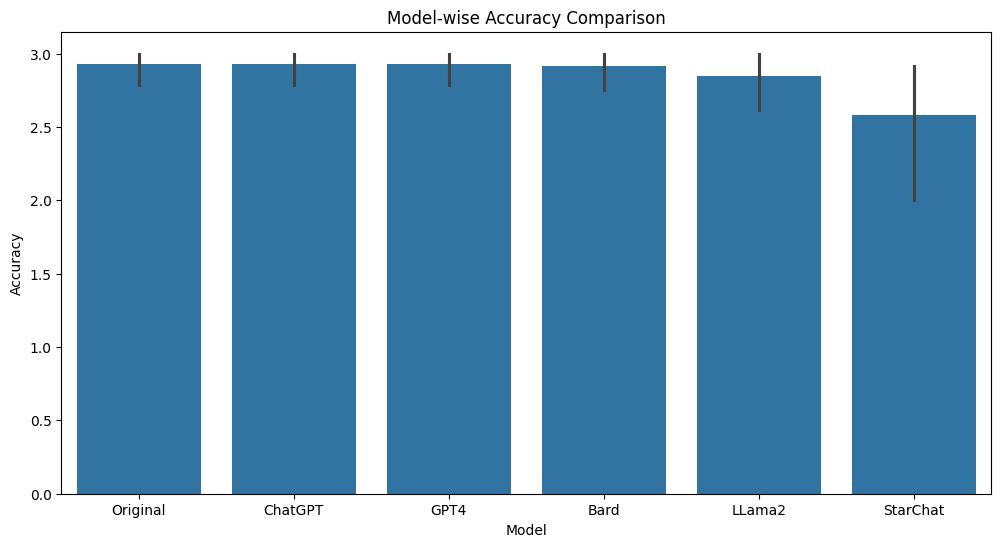

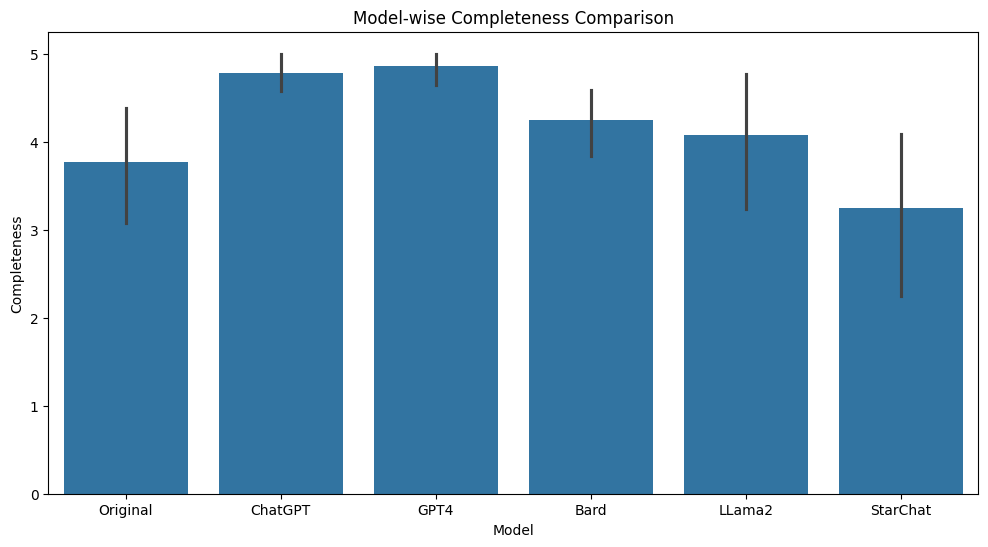

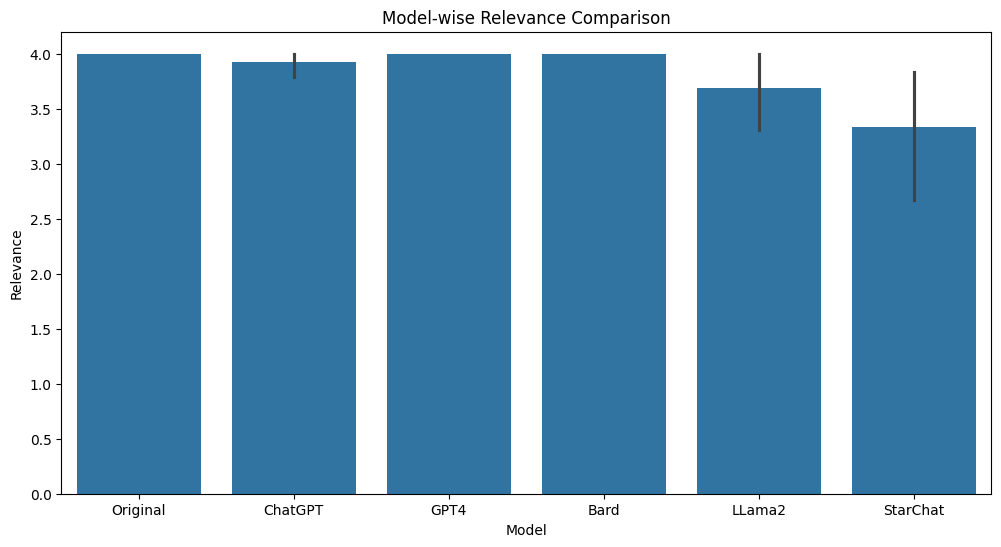

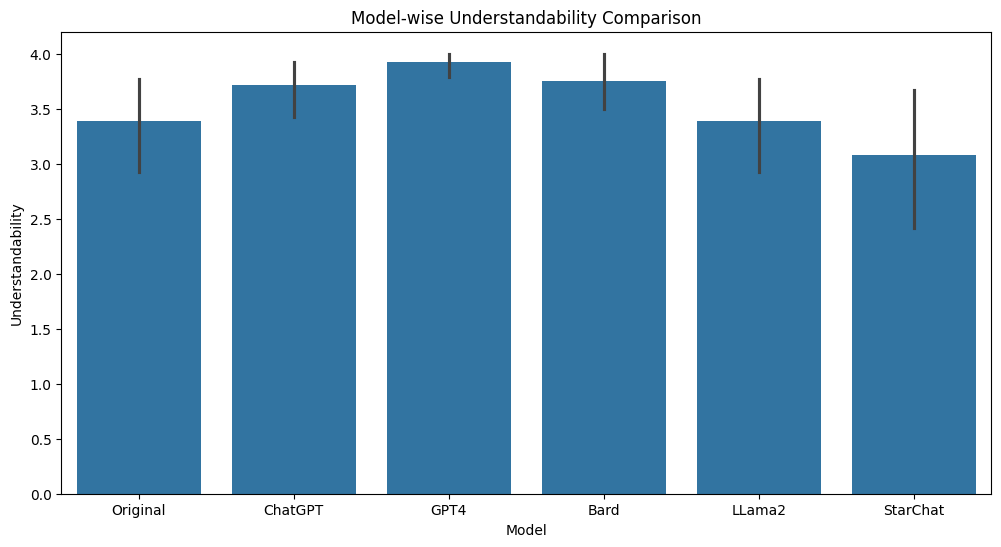

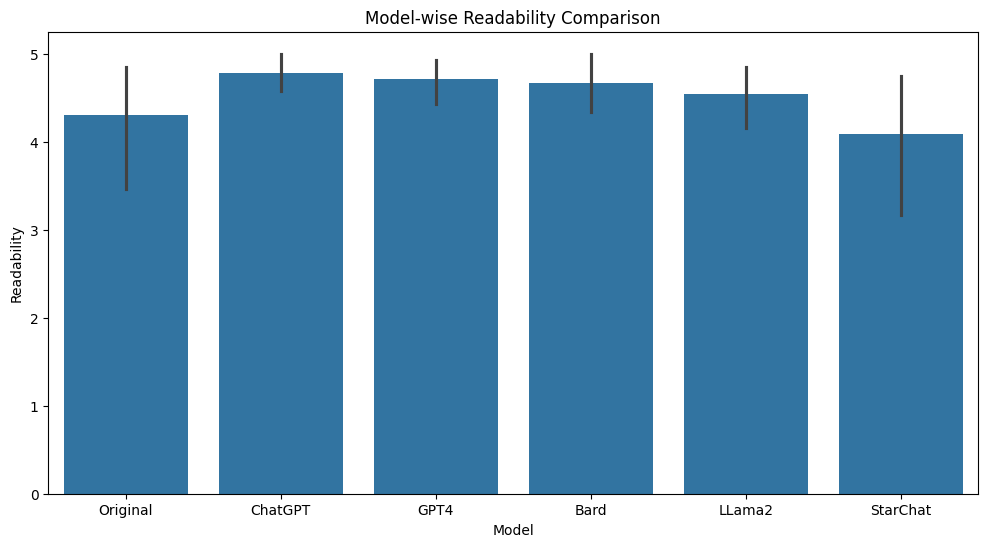

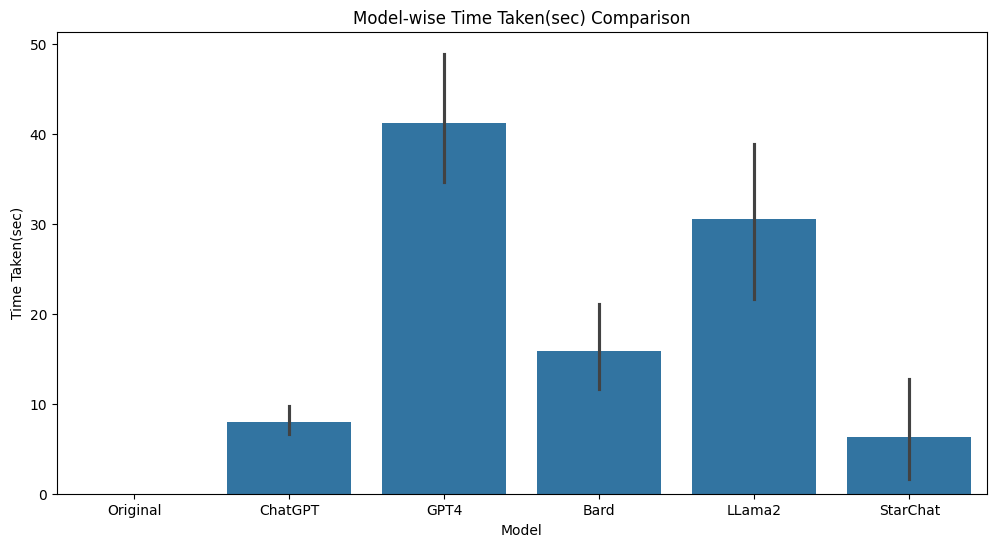

Correlation Matrix:
                   Accuracy  Completeness  Relevance  Understandability  \
Accuracy           1.000000      0.531393   0.723276           0.645079   
Completeness       0.531393      1.000000   0.596981           0.697860   
Relevance          0.723276      0.596981   1.000000           0.750384   
Understandability  0.645079      0.697860   0.750384           1.000000   
Readability        0.581849      0.507307   0.557911           0.568045   
Time Taken(sec)    0.052361      0.210549   0.040084           0.191366   

                   Readability  Time Taken(sec)  
Accuracy              0.581849         0.052361  
Completeness          0.507307         0.210549  
Relevance             0.557911         0.040084  
Understandability     0.568045         0.191366  
Readability           1.000000         0.100132  
Time Taken(sec)       0.100132         1.000000  


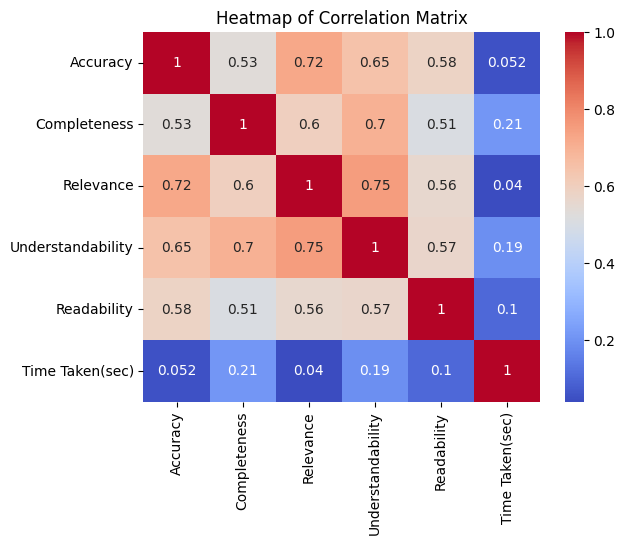

COLUMNS:  Index(['Model', 'Accuracy', 'Completeness', 'Relevance', 'Understandability',
       'Readability', 'Time Taken(sec)', 'Notes', 'Level', 'FileName'],
      dtype='object')
COLUMNS:  Index(['Model', 'Accuracy', 'Completeness', 'Relevance', 'Understandability',
       'Readability', 'Time Taken(sec)'],
      dtype='object')
Average Performance of Each Model:
          Accuracy  Completeness  Relevance  Understandability  Readability  \
Model                                                                         
Bard      2.916667      4.250000   4.000000           3.750000     4.666667   
ChatGPT   2.928571      4.785714   3.928571           3.714286     4.785714   
GPT4      2.928571      4.857143   4.000000           3.928571     4.714286   
LLama2    2.846154      4.076923   3.692308           3.384615     4.538462   
Original  2.928571      3.769231   4.000000           3.384615     4.307692   
StarChat  2.583333      3.250000   3.333333           3.083333     4.083333   

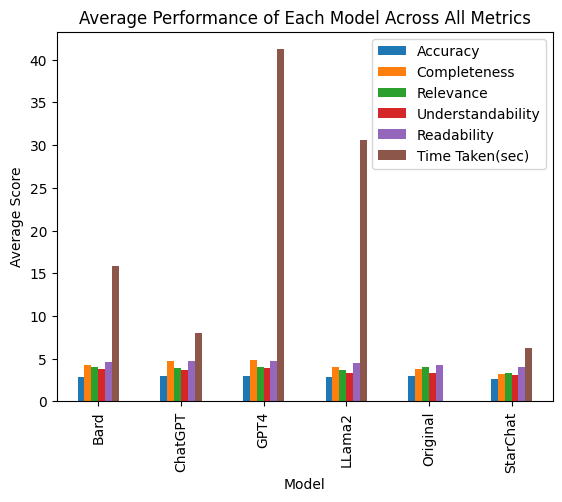


Observations for model: Original
Descriptive Statistics:
        Accuracy  Completeness  Relevance  Understandability  Readability  \
count  14.000000     13.000000       13.0          13.000000    13.000000   
mean    2.928571      3.769231        4.0           3.384615     4.307692   
std     0.267261      1.300887        0.0           0.767948     1.377474   
min     2.000000      1.000000        4.0           2.000000     0.000000   
25%     3.000000      3.000000        4.0           3.000000     4.000000   
50%     3.000000      4.000000        4.0           4.000000     5.000000   
75%     3.000000      5.000000        4.0           4.000000     5.000000   
max     3.000000      5.000000        4.0           4.000000     5.000000   

       Time Taken(sec)  
count             14.0  
mean               0.0  
std                0.0  
min                0.0  
25%                0.0  
50%                0.0  
75%                0.0  
max                0.0  

Observations for model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from scipy.stats import f_oneway

# concatonate all dataframes
dfs = []
for filename in glob.glob('Data/*.csv'):
    df = pd.read_csv(filename)
    df['FileName'] = filename
    # df.drop('Notes', axis=1, inplace=True)
    dfs.append(df)
full_df = pd.concat(dfs, ignore_index=True)

all_data = full_df.copy()
# Data cleaning
all_data['Time Taken(sec)'].fillna(0, inplace=True) # this preprocessing is done because the time taken for the human made documentations for the code snippets is defaulted to NaN

# 1. Descriptive statistics
descriptive_stats = all_data.describe()
print(f"Descriptive Statistics:\n{descriptive_stats}\n")

# 2. Barplot for each metric to compare among models
models = ['Original', 'ChatGPT', 'GPT4', 'Bard', 'LLama2', 'StarChat']
metrics = ['Accuracy', 'Completeness', 'Relevance', 'Understandability', 'Readability', 'Time Taken(sec)']
for metric in metrics:
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Model', y=metric, data=all_data)
    plt.title(f'Model-wise {metric} Comparison')
    plt.show()

# 3. Statistical testing: ANOVA

# Correlation matrix
correlation_matrix = all_data[metrics].corr()
print("Correlation Matrix:")
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

# Average performance of each model across all metrics
print("COLUMNS: ", all_data.columns)
all_data = all_data.drop(['Notes', 'Level', 'FileName'], axis=1, inplace=False)
print("COLUMNS: ", all_data.columns)
avg_performance = all_data.groupby('Model').mean()
print("Average Performance of Each Model:")
print(avg_performance)
# Plot average performance
avg_performance.plot(kind='bar')
plt.title('Average Performance of Each Model Across All Metrics')
plt.xlabel('Model')
plt.ylabel('Average Score')
plt.show()

# Observations for each model
unique_models = all_data['Model'].unique()
for model in unique_models:
    model_data = all_data[all_data['Model'] == model].drop('Model', axis=1, inplace=False)
    print(f"\nObservations for model: {model}")
    
    # Descriptive statistics
    print("Descriptive Statistics:")
    print(model_data.describe())


In [2]:
all_data['Model'].unique()

array(['Original', 'ChatGPT', 'GPT4', 'Bard', 'LLama2', 'StarChat'],
      dtype=object)

In [3]:
import numpy as np

# 3. Statistical testing: ANOVA
for metric in metrics:
    scores = []
    for model in models:
        score = all_data[all_data['Model'] == model][metric]
        scores.append(score[score.notna()])

    if len(scores) >= 2:
        f_stat, p_val = f_oneway(*scores)
        print(f'F-statistic for {metric}: {f_stat}, P-value: {p_val}')

F-statistic for Accuracy: 1.1803345504498577, P-value: 0.327173259218914
F-statistic for Completeness: 3.9874843554443054, P-value: 0.003001909409607789
F-statistic for Relevance: 3.159996402554188, P-value: 0.012342548222906116
F-statistic for Understandability: 2.2788310228550013, P-value: 0.05562952561629534
F-statistic for Readability: 1.06653445133066, P-value: 0.38612439205123156
F-statistic for Time Taken(sec): 29.53653139543142, P-value: 1.0497126687675402e-16


In [4]:
full_df['Level'].value_counts()

Level
File        30
inline      30
function    24
Name: count, dtype: int64

FILE
        Accuracy  Completeness  Relevance  Understandability  Readability  \
count  27.000000     27.000000  27.000000               27.0    27.000000   
mean    2.629630      3.481481   3.629630                3.0     3.851852   
std     0.687702      1.451004   0.883531                1.0     1.292097   
min     0.000000      0.000000   0.000000                0.0     0.000000   
25%     2.000000      3.000000   4.000000                3.0     4.000000   
50%     3.000000      4.000000   4.000000                3.0     4.000000   
75%     3.000000      5.000000   4.000000                4.0     5.000000   
max     3.000000      5.000000   4.000000                4.0     5.000000   

       Time Taken(sec)  
count        25.000000  
mean         18.920000  
std          16.049195  
min           2.000000  
25%          10.000000  
50%          12.000000  
75%          27.000000  
max          64.000000   

INLINE
       Accuracy  Completeness  Relevance  Understandability  Readab

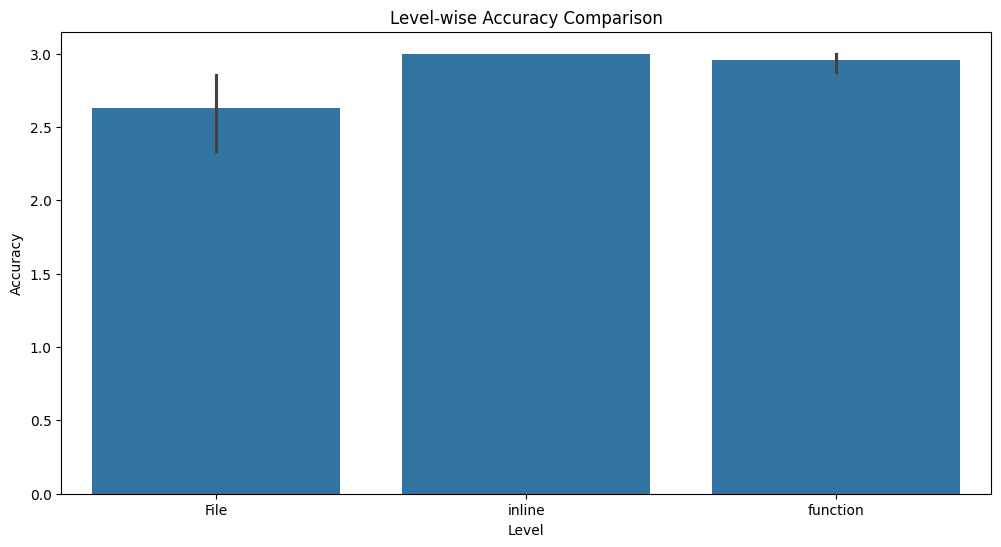

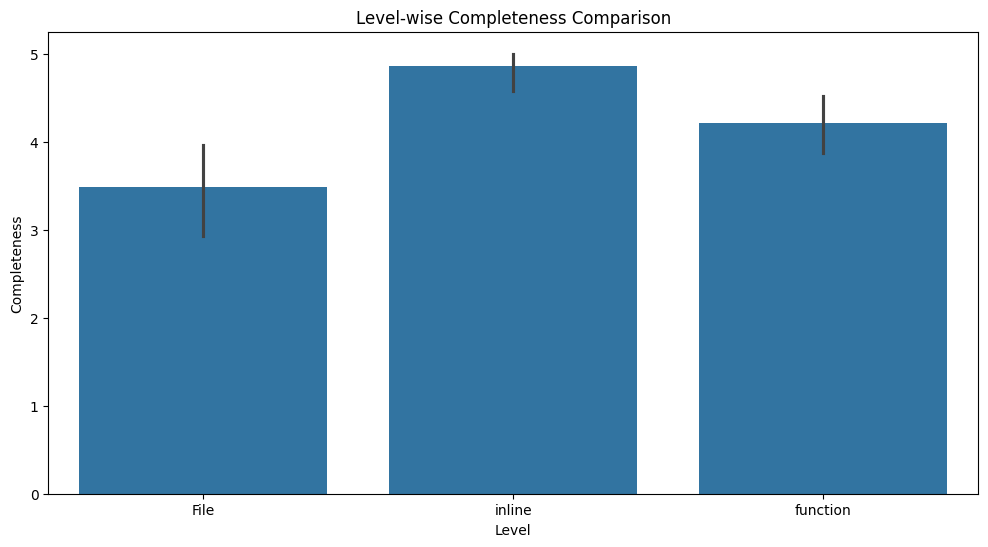

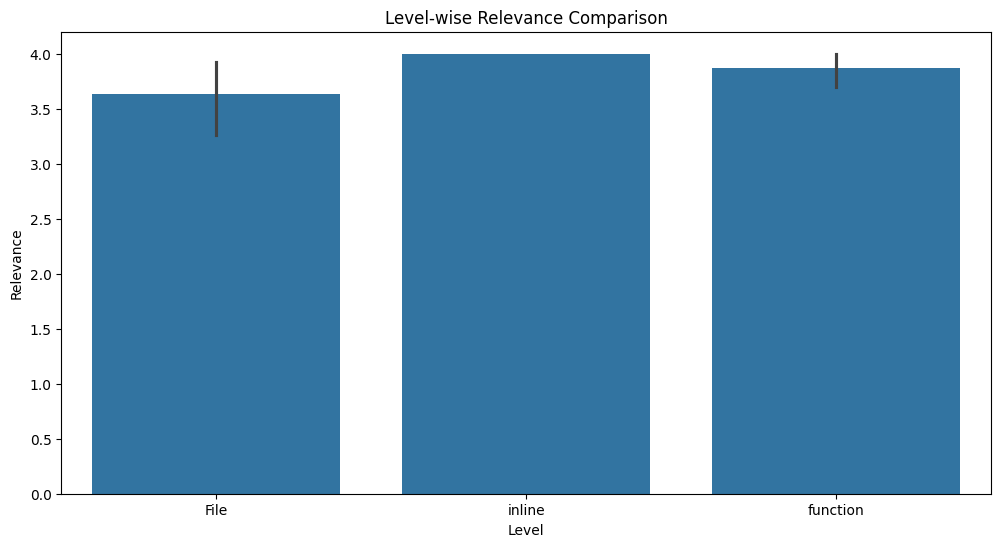

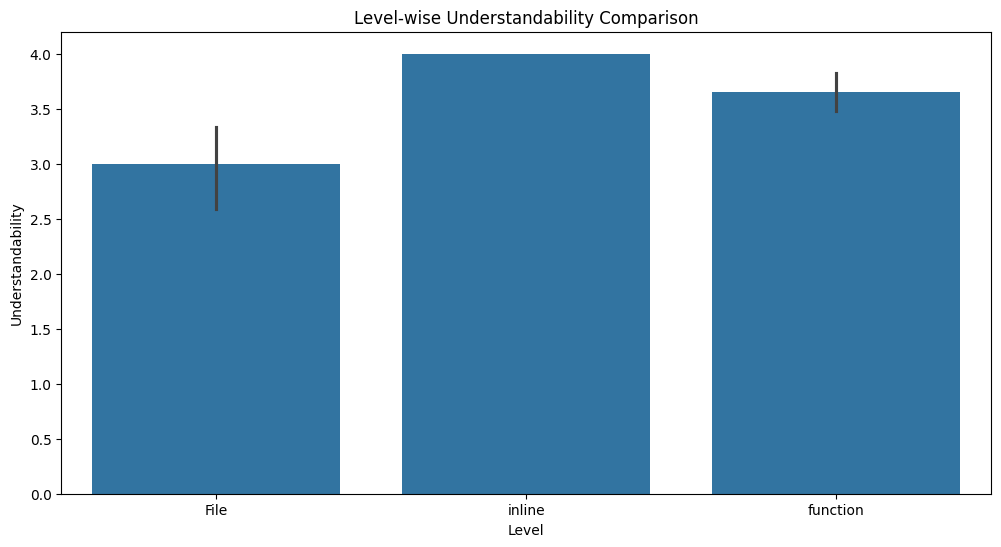

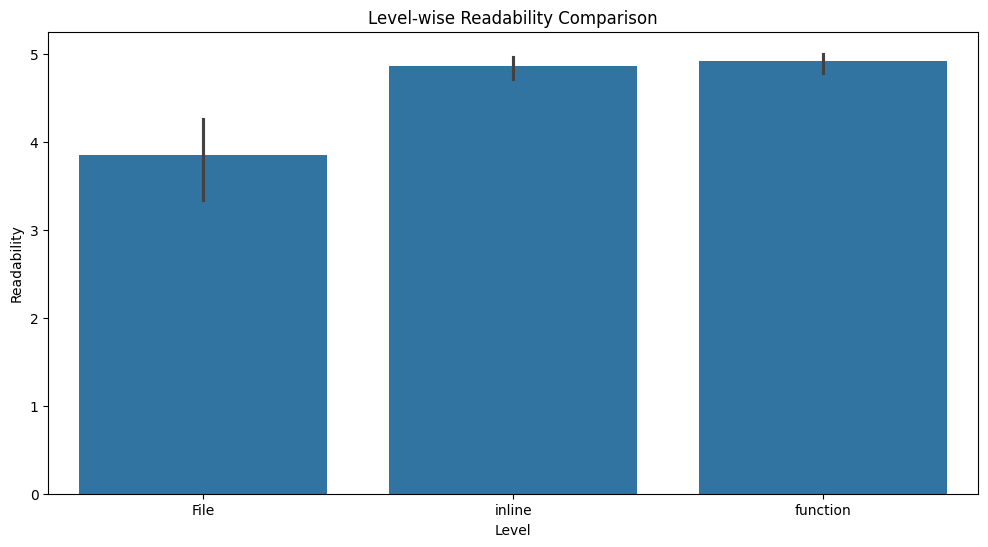

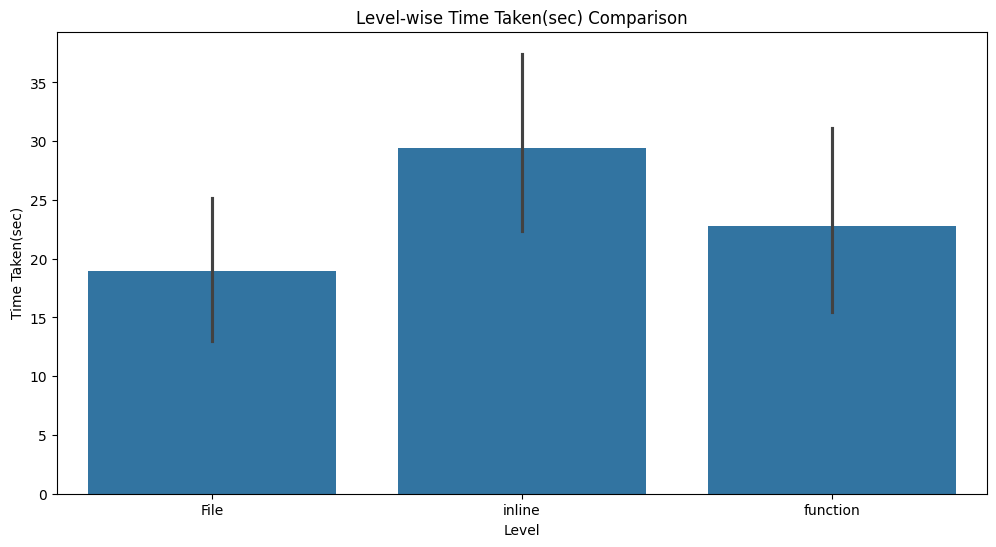

Average Performance of Each Level:
          Accuracy  Completeness  Relevance  Understandability  Readability
Level                                                                      
File      2.629630      3.481481   3.629630           3.000000     3.851852
function  2.958333      4.217391   3.869565           3.652174     4.913043
inline    3.000000      4.857143   4.000000           4.000000     4.857143


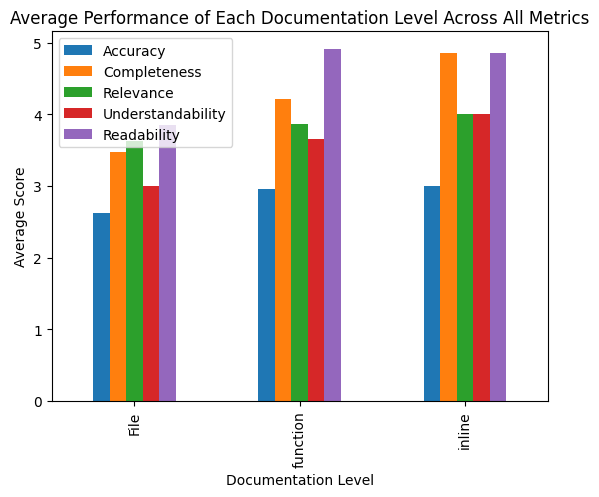

In [6]:
for level in full_df['Level'].unique():
    if type(level) == type('string'):
        print(level.upper().lstrip())
        print(full_df[full_df['Level'] == level].describe(), '\n')

for metric in metrics:
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Level', y=metric, data=full_df)
    plt.title(f'Level-wise {metric} Comparison')
    plt.show()

temp_df = full_df.copy()
temp_df.drop(['Notes', 'Model', 'FileName', 'Time Taken(sec)'], axis=1, inplace=True)
avg_performance = temp_df.groupby('Level').mean()
print("Average Performance of Each Level:")
print(avg_performance)
# Plot average performance
avg_performance.plot(kind='bar')
plt.title('Average Performance of Each Documentation Level Across All Metrics')
plt.xlabel('Documentation Level')
plt.ylabel('Average Score')
plt.show()

In [ ]:
for level in full_df['Level'].unique():
    if type(level) == type('string'):
        print(level.upper().lstrip())
        print(full_df[full_df['Level'] == level].info(), '\n')

FILE
<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 0 to 71
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Model              30 non-null     object 
 1   Accuracy           27 non-null     float64
 2   Completeness       27 non-null     float64
 3   Relevance          27 non-null     float64
 4   Understandability  27 non-null     float64
 5   Readability        27 non-null     float64
 6   Time Taken(sec)    25 non-null     float64
 7   Notes              28 non-null     object 
 8   Level              30 non-null     object 
 9   FileName           30 non-null     object 
dtypes: float64(6), object(4)
memory usage: 2.6+ KB
None 

INLINE
<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 6 to 83
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Model              30 non-null     object 
 1   Accuracy